## Cargar y Visualizar las Imágenes

Cargamos las imágenes y las visualizamos para asegurarnos de que están correctamente importadas.


In [ ]:
# permisos para acceder a googleDrive
from google.colab import drive
drive.mount('/content/drive')

In [20]:
import os
drive_folder = 'drive/MyDrive/TESIS/'

# Definición de la base de datos
data_folder = drive_folder + 'db/data/'
image_folder = drive_folder + 'db/images/cow/'
shape_folder = drive_folder + 'db/images/shape/'

# si no da error es que se cargaron bien
files = os.listdir(image_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


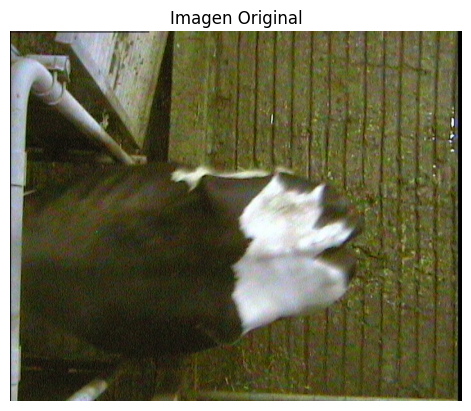

In [21]:
import cv2
import matplotlib.pyplot as plt
import os

# Obtener lista de archivos en la carpeta
image_paths  = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

# Función para cargar y mostrar imágenes
def load_and_display_image(image_paths):
    image = cv2.imread(image_paths)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    plt.imshow(image_rgb)
    plt.title("Imagen Original")
    plt.axis('off')
    plt.show()

# Mostrar una imagen de ejemplo
load_and_display_image(image_paths[0])

## Preprocesamiento de las Imágenes

A continuación, aplicamos técnicas de preprocesamiento como el escalado, la eliminación de ruido, etc.


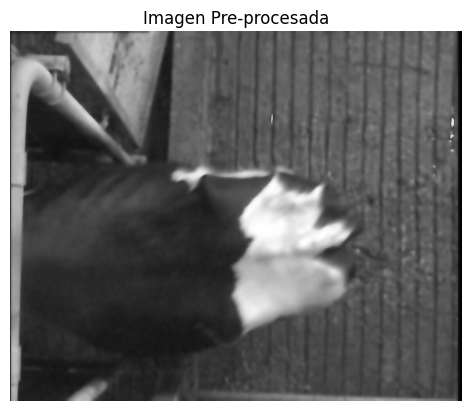

In [55]:
def preprocess_image(image):
    # Convertir a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Ecualización del histograma para mejorar el contraste
    # equ = cv2.equalizeHist(gray)

    # Eliminar ruido usando un filtro Gaussiano
    # blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Aplicar filtro bilateral para reducir el ruido mientras se conservan los bordes
    blurred = cv2.bilateralFilter(gray, 9, 75, 75)

    return blurred

# Aplicar preprocesamiento a una imagen y mostrarla
image = cv2.imread(image_paths[0])
preprocessed_image = preprocess_image(image)
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Imagen Pre-procesada")
plt.axis('off')
plt.show()


# Aplicar Diferentes Algoritmos de Segmentación

Vamos a implementar y aplicar varios algoritmos de segmentación y comparar los resultados.


## Umbralización (Thresholding)


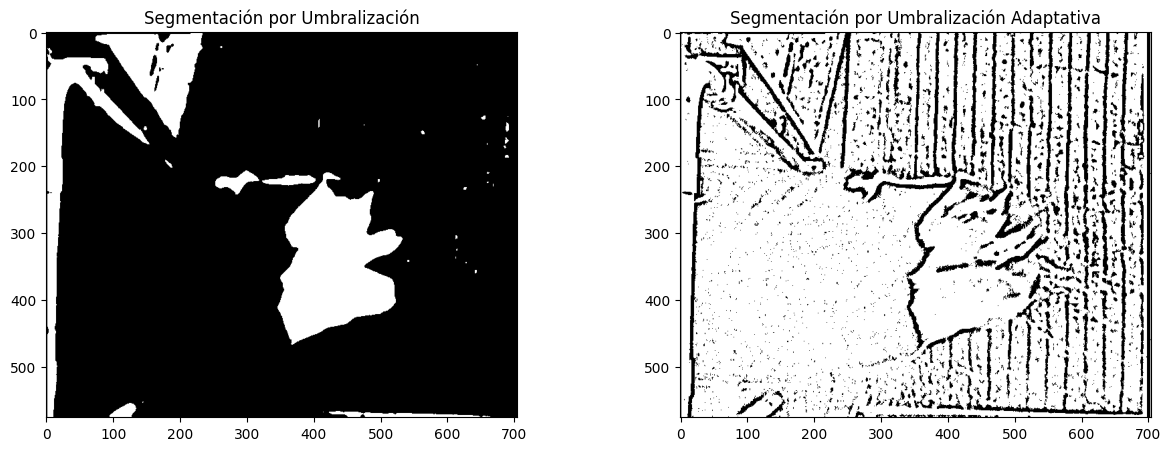

In [70]:
def threshold_segmentation_1(image):
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def threshold_segmentation_2(image):
    thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

thresholded_image1 = threshold_segmentation_1(preprocessed_image)
thresholded_image2 = threshold_segmentation_2(preprocessed_image)

# Mostrar la imagen segmentada
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(thresholded_image1, cmap='gray')
axes[0].set_title('Segmentación por Umbralización')
axes[1].imshow(thresholded_image2, cmap='gray')
axes[1].set_title('Segmentación por Umbralización Adaptativa')
plt.show()

## Detección de Bordes (Canny)


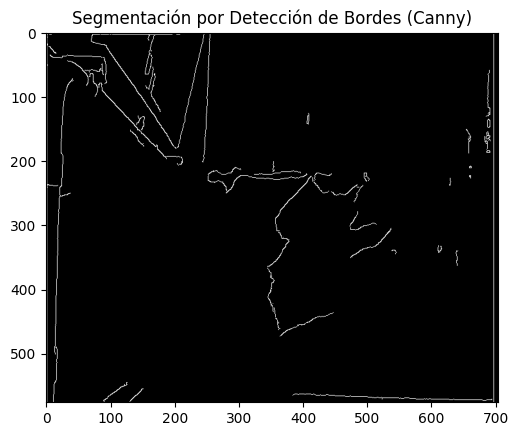

In [73]:
def canny_segmentation(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# Aplicar Canny y mostrar la imagen segmentada
canny_image = canny_segmentation(preprocessed_image)
plt.imshow(canny_image, cmap='gray')
plt.title("Segmentación por Detección de Bordes (Canny)")
plt.show()

## Contornos Activos (Active Contours)


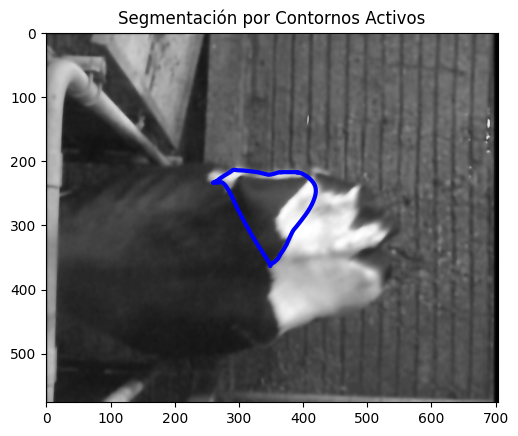

In [72]:
from skimage.segmentation import active_contour
from skimage.draw import circle_perimeter
import numpy as np

def active_contour_segmentation(image):
    s = np.linspace(0, 2*np.pi, 400)
    r = image.shape[0] // 2 + 100*np.sin(s)
    c = image.shape[1] // 2 + 100*np.cos(s)
    init = np.array([r, c]).T

    snake = active_contour(image, init, alpha=0.015, beta=10, gamma=0.001)
    return snake

# Aplicar Contornos Activos y mostrar la imagen segmentada
snake = active_contour_segmentation(preprocessed_image)

fig, ax = plt.subplots()
ax.imshow(preprocessed_image, cmap=plt.cm.gray)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
plt.title("Segmentación por Contornos Activos")
plt.show()

# Evaluar los Resultados

Finalmente, evaluamos la calidad de cada método de segmentación usando métricas como la precisión, el recall, o una comparación visual si no se tiene el ground truth.


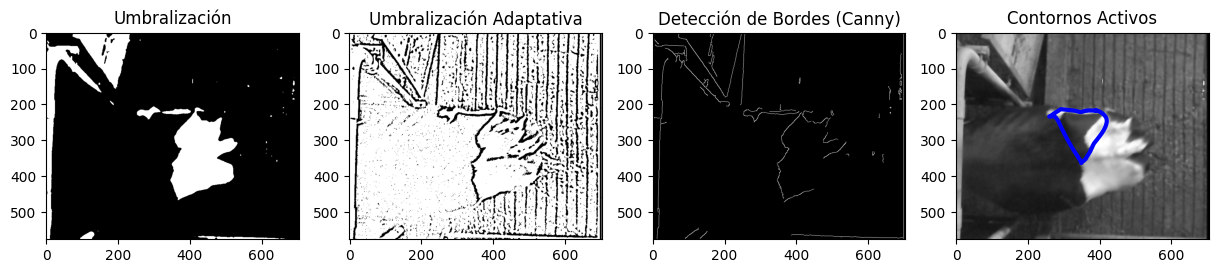

In [76]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(thresholded_image1, cmap='gray')
axes[0].set_title('Umbralización')
axes[1].imshow(thresholded_image2, cmap='gray')
axes[1].set_title('Umbralización Adaptativa')
axes[2].imshow(canny_image, cmap='gray')
axes[2].set_title('Detección de Bordes (Canny)')
axes[3].imshow(preprocessed_image, cmap='gray')
axes[3].plot(snake[:, 1], snake[:, 0], '-b', lw=3)
axes[3].set_title('Contornos Activos')
plt.show()